## Importing Pakages

In [1]:
import numpy as np
import copy

## Parameters

In [2]:
k = 5
x_test = [1,1]

## Loading the Dataset

In [3]:
x_train = np.transpose(np.genfromtxt('X.csv',delimiter=','))           # Loading training dataset
y_train = (np.genfromtxt('Y.csv',delimiter=',')).reshape((1000,1))     #loading the correspoding labels

## Finding the Euclidian Distance for all the training samples w.r.t test sample

In [4]:
dist = []
for i in range(0,1000):
    dist.append(np.linalg.norm(x_train[i]-x_test))    #Finding the distance
# print(size(dist))
dist = np.asarray(dist)
dist_label = np.append(dist.reshape(1000,1),y_train,axis = 1)   #mapping the distances with the lables
print(dist_label)

[[ 2.03030034  1.        ]
 [ 3.71738819 -1.        ]
 [ 2.17987734  1.        ]
 ...
 [ 2.1560412  -1.        ]
 [ 0.52724465  1.        ]
 [ 0.58514677  1.        ]]


## Sorting the distances along with the corresonding labels

In [5]:
dist_sorted = np.append(x_train,dist_label,axis = 1)           #Mapping distances with the lables and the samples
for i in range(0,1000):
    for j in range(i,0,-1):
        if dist_sorted[j,2] < dist_sorted[j-1,2]:
            temp = copy.deepcopy(dist_sorted[j-1])
            dist_sorted[j-1] = copy.deepcopy(dist_sorted[j])
            dist_sorted[j] = copy.deepcopy(temp)

## Predecting the Labels

In [6]:
if np.sum(dist_sorted[1:k,3]) > 0:
    print("label = 1")
else:
    print("label = -1")

label = 1


# Visualisation

(493, 2)
(507, 2)


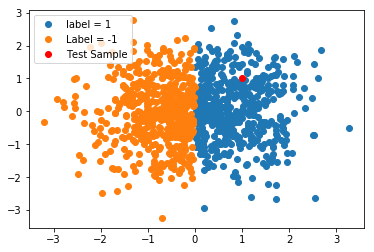

In [8]:
import matplotlib.pyplot as plt

x_train_1 = []
x_train_0 = []
for i in range(0,1000):
    if y_train[i] == 1:
        x_train_1.append(x_train[i])
    else:
        x_train_0.append(x_train[i])
x_train_1 = np.asarray(x_train_1)
x_train_0 = np.asarray(x_train_0)
print(x_train_1.shape)
print(x_train_0.shape)

plt.plot(x_train_1[:,0],x_train_1[:,1],'o',label = 'label = 1')
plt.plot(x_train_0[:,0],x_train_0[:,1],'o', label = 'Label = -1')
plt.plot(x_test[0],x_test[1],'ro',label = 'Test Sample')
plt.legend()
plt.show()

# Observations

- K-Nearest Neighbours classifier has been implemented
- Interpreting the two demensions as coordinates of the cartesian plane, the data has been visualized 
- As the data is neat and well distigushable, The is no change in prediction by change in "k".

The predictions on the test data given is as follows:
- for [1,-1] the estimated label is "1"
- for [1,1] the estimated label is "1"
- for [-1,-1] the estimated label is "-1"
- for [-1,1] the estimated label is "-1"

